<h1><strong>Sistema neuro-fuzzy para a base de dados Inflow.</strong></h1>

<strong>Aluno: Wallace Ketler Melo de Morais</strong>

Em primeiro plano, deve-se receber e tratar a base de dados inflow

   1.0744628000000001e-01   1.6134789999999999e-01   2.0054258999999999e-01
   9.4024416000000000e-02   1.0744628000000001e-01   1.6134789999999999e-01
   8.8812736000000003e-02   9.4024416000000000e-02   1.0744628000000001e-01
   1.4699793000000000e-01   8.8812736000000003e-02   9.4024416000000000e-02
   2.0846719000000000e-01   1.4699793000000000e-01   8.8812736000000003e-02
   2.4573428000000000e-01   2.0846719000000000e-01   1.4699793000000000e-01
   2.7479118000000002e-01   2.4573428000000000e-01   2.0846719000000000e-01
   2.8749911000000000e-01   2.7479118000000002e-01   2.4573428000000000e-01
   2.9413864000000001e-01   2.8749911000000000e-01   2.7479118000000002e-01
   3.2076819000000001e-01   2.9413864000000001e-01   2.8749911000000000e-01
   3.5053901999999998e-01   3.2076819000000001e-01   2.9413864000000001e-01
   3.2969229999999999e-01   3.5053901999999998e-01   3.2076819000000001e-01
   2.7586207000000001e-01   3.2969229999999999e-01   3.5053901999999998e-01
   2.8078818

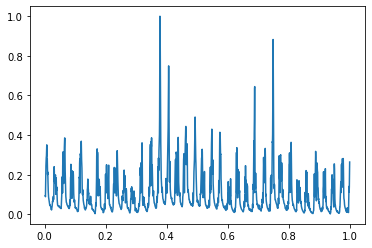

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

#Importa as três entradas e a saída desejada
import_x = open("/content/xt.xls")
import_y = open("/content/yt.xls")
inputs =     import_x.read()
outputs =    import_y.read()
print(inputs)

#trata dados para serem float
list_inputs = []
list_inputs_width = 0
list_heigth = 0
list_output = []

for i in inputs.split("\n"):
  list_inputs.append(i.strip().strip().split("  "))
list_inputs_width = len(list_inputs[0])
list_heigth = len(list_inputs)

for i in range(list_heigth - 1):
  for j in range(list_inputs_width):
    list_inputs[i][j] = float(list_inputs[i][j])

list_inputs[0][0] = float(list_inputs[0][0])


for i in outputs.split("\n"):
  list_output.append(i.strip())

for i in range(list_heigth - 1):
  list_output[i] = float(list_output[i])

#Separa dados da forma correta
input1 = []
input2 = []
input3 = []

data_x = [[0 for i in range(list_heigth-1)] for j in range(list_inputs_width)]
data_x_sorted = [[0 for i in range(list_heigth-1)] for j in range(list_inputs_width)]

data_y = list_output

for i in range(list_heigth-1):
  input1.append(list_inputs[i][0])

for i in range(list_inputs_width):
  for j in range(list_heigth - 1):
    data_x[i][j] = list_inputs[j][i]
  data_x_sorted[i] = sorted(data_x[i])

#plotando a saída
data_y.pop()
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), data_y)
plt.show()

Como temos $n$ entradas, teremos $n$ neurônios e $n$ antecedentes. Não teremos defuzzificação, pois os antecedentes servirão como entrada pros neurônios, de modo que a soma das saídas deles será um valor CRISP.

In [ ]:
#define a função de pertinência triangular usada
def triangular(x:float,a:float,m:float,b:float):
    return max(min((x-a)/(m-a),(b-x)/(b-m)),0)
#define taxa de aprendizado
def alfa(alfa_parameters):
  denominator = 0
  for i in range(len(alfa_parameters)):
    denominator += alfa_parameters[i]**2
  return (1/denominator)

Para cada uma das entradas, devemos montar um antecedente, de modo que, para cada um dos antecedentes, serão definidas três funções de ativação triangulares

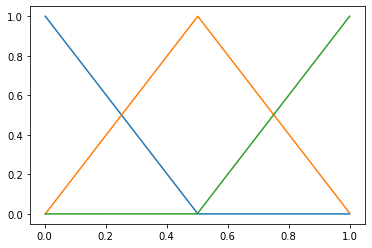

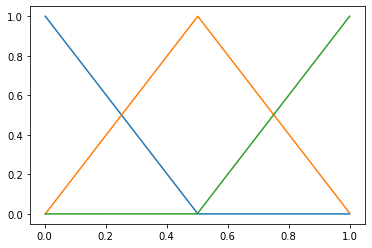

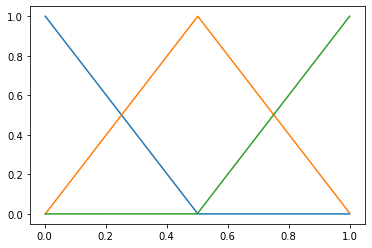

1854


In [ ]:
inputs_domains = [np.linspace(min(data_x[i]),max(data_x[i]),list_heigth-1) for i in range(list_inputs_width)]
inputs_images1 =  [[] for j in range(list_inputs_width)]
inputs_images2 =  [[] for j in range(list_inputs_width)]
inputs_images3 =  [[] for j in range(list_inputs_width)]

for i in range(list_inputs_width):          #temos 3 antecedentes
  for j in range(list_heigth-1):            #temos n valores nos domínios
      inputs_images1[i].append(triangular(inputs_domains[i][j],(min(data_x[i])-0.50),(min(data_x[i])),(min(data_x[i])+0.50)))
      inputs_images2[i].append(triangular(inputs_domains[i][j],(min(data_x[i])),(min(data_x[i])+0.50),(min(data_x[i])+1.0)))
      inputs_images3[i].append(triangular(inputs_domains[i][j],(max(data_x[i])-0.50),(max(data_x[i])),(max(data_x[i])+0.50)))
  plt.plot(inputs_domains[i],inputs_images1[i])
  plt.plot(inputs_domains[i],inputs_images2[i])
  plt.plot(inputs_domains[i],inputs_images3[i])
  plt.show()
print(len(inputs_images1[0]))



Com os antecedentes, agora, devemos aplicar as entradas nos neurônios<br><hr>

Treinamento

Valor esperado


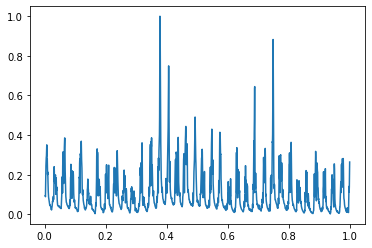

Valor previsto após dez épocas


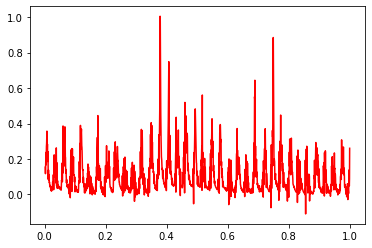

Valor esperado e previsto juntos


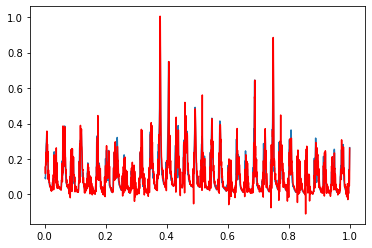

In [ ]:
#Gera pesos inicialmente aleatórios
w = [[(random.random()) for i in range(3)] for j in range(list_inputs_width)]
#cria saídas e entradas de cada neurônio
input_neuron = [[0 for i in range(3)] for j in range(list_inputs_width)]
output_neuron = [0 for i in range(3)]

#multiplica pesos pelas entradas e soma para calcular o erro
#print(inputs_images1)
for e in range(10): #número de épocas de treinamento
  #cria lista de saídas atuais para plotar e comparar com a desejada
  actual_output = []
  for i in range(list_heigth - 1):
    #zera parametros do alfa
    alfa_parameters = []
    #cria saída CRISP final
    crisp = 0
    #cria erro
    error = 0
    output_neuron = [0 for i in range(3)]

    input_neuron = [[0 for i in range(3)] for j in range(list_inputs_width)]
    for j in range(list_inputs_width):  
      for k in range(3):
        if(k==0):
          input_neuron[j][k] = w[j][k] * inputs_images1[j][data_x_sorted[j].index(data_x[j][i])]
          alfa_parameters.append(inputs_images1[j][data_x_sorted[j].index(data_x[j][i])])
        elif(k==1):
          input_neuron[j][k] = w[j][k] * inputs_images2[j][data_x_sorted[j].index(data_x[j][i])]
          alfa_parameters.append(inputs_images2[j][data_x_sorted[j].index(data_x[j][i])])
        elif(k==2):
          input_neuron[j][k] = w[j][k] * inputs_images3[j][data_x_sorted[j].index(data_x[j][i])]
          alfa_parameters.append(inputs_images3[j][data_x_sorted[j].index(data_x[j][i])])
        output_neuron[j] += input_neuron[j][k]
         
      crisp += output_neuron[j] 
    error = data_y[i] - crisp 
    
    #corrige pesos
    for j in range(list_inputs_width):
      for k in range(3):
        if(k==0):
          w[j][k] += alfa(alfa_parameters) * inputs_images1[j][data_x_sorted[j].index(data_x[j][i])] * error
        elif(k==1): 
          w[j][k] += alfa(alfa_parameters) * inputs_images2[j][data_x_sorted[j].index(data_x[j][i])] * error
        elif(k==2):
          w[j][k] += alfa(alfa_parameters) * inputs_images3[j][data_x_sorted[j].index(data_x[j][i])] * error
    actual_output.append(crisp)

    
print("Valor esperado")
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), data_y)
plt.show()
print("Valor previsto após dez épocas")
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), actual_output, color = "red")
plt.show()
print("Valor esperado e previsto juntos")
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), data_y)
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), actual_output, color = "red")
plt.show()




Teste


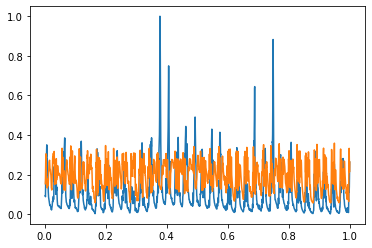

In [ ]:
actual_output = []
for i in range(list_heigth - 1):
  #print(w)
  #cria saída CRISP final
  crisp = 0
  output_neuron = [0 for i in range(3)]

  input_neuron = [[0 for i in range(3)] for j in range(list_inputs_width)]
  #print(output_neuron)
  for j in range(list_inputs_width):  
    for k in range(3):
      if(k==0):
        input_neuron[j][k] = w[j][k] * inputs_images1[j][data_x_sorted[j].index(data_x[j][i])]
      elif(k==1):
        input_neuron[j][k] = w[j][k] * inputs_images2[j][data_x_sorted[j].index(data_x[j][i])]
      elif(k==2):
        input_neuron[j][k] = w[j][k] * inputs_images3[j][data_x_sorted[j].index(data_x[j][i])]
      output_neuron[j] += input_neuron[j][k] 
    crisp += output_neuron[j] 
  actual_output.append(crisp)

    
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), data_y)
plt.plot(np.linspace(min(data_y),max(data_y),list_heigth-1), actual_output)
plt.show()

Dessa forma, percebe-se no teste que as alturas não ficaram satisfatórias, entretanto o restante está adequado. Nesse sentido, verifica-se que no treinamento, após o início de ajustes, o resultado foi melhor que no teste.